In [2]:
import os, sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)

from datasets.BavarianCrops_Dataset import *
from datasets.dataset_utils import *
from datasets.sequence_aggregator import *

from explainability_analysis.util import *
from explainability_analysis.crop_spectral_signature_analysis import *

num_classes = 12
home_path = str(Path.home())
dataset_folder = os.path.join(home_path, "Desktop/Explainable Machine Learning in Earth Observations/Projects/EO_explainability_survey/Datasets/BavarianCrops")
model_root_path = os.path.join(home_path, "EO_explainability_survey/training_results/bavarian_crops/pos_enc_obs_date/{}_classes/".format(num_classes))

class_mapping = os.path.join(dataset_folder, "classmapping{}.csv".format(num_classes))

predictions_path = os.path.join(model_root_path, "weekly_average", "predictions")
predictions = np.loadtxt(
    os.path.join(predictions_path, "predicted_vs_true.csv"),
    skiprows = 1,
    delimiter = ",",
    dtype = np.uint)
labels_classes = get_labels_for_parcel_ids(predictions[:,0], predictions_path)
predictions = pd.DataFrame(predictions, columns = ["PARCEL_ID", "LABEL", "PREDICTED"])
predictions["CLASS_NAME"] = labels_classes
_,_,test_dataset = get_partitioned_dataset(dataset_folder, class_mapping, WeeklySequenceAggregator())
spectral_indices_per_parcel = test_dataset.calculate_spectral_indices()

C:\Users\Ivica Obadic\PycharmProjects\EOExplainability
Initializing BavarianCropsDataset train partition in holl
read 12 classes
precached dataset files found at C:\Users\Ivica Obadic\Desktop/Explainable Machine Learning in Earth Observations/Projects/EO_explainability_survey/Datasets/BavarianCrops\npy\classmapping12.csv\blocks\holl\train
loaded 20858 samples
Dataset C:\Users\Ivica Obadic\Desktop/Explainable Machine Learning in Earth Observations/Projects/EO_explainability_survey/Datasets/BavarianCrops. region holl. partition train. X:20858x(71, 16), y:(20858,) with 12 classes
Initializing BavarianCropsDataset valid partition in holl
read 12 classes
precached dataset files found at C:\Users\Ivica Obadic\Desktop/Explainable Machine Learning in Earth Observations/Projects/EO_explainability_survey/Datasets/BavarianCrops\npy\classmapping12.csv\blocks\holl\valid
loaded 3909 samples
Dataset C:\Users\Ivica Obadic\Desktop/Explainable Machine Learning in Earth Observations/Projects/EO_explainab

In [28]:
aggregation_time_frame = "WEEK"
average_crop_type_signature = calc_spectral_signature_per_class_and_time_frame(spectral_indices_per_parcel, predictions, aggregation_time_frame)

Concatenating all observations into a single dataframe
Aggregating the spectral indices based on the time frame method


In [ ]:
average_ndvi_per_crop_type = average_ndvi_per_crop_type.pivot(index="CLASS", 
                                                              columns=aggregation_time_frame, 
                                                              values='NDVI')

average_ndvi_per_crop_type.to_csv(os.path.join(predictions_path, "{}_NDVI.csv".format(aggregation_time_frame)), index=False)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1 = sns.heatmap(average_ndvi_per_crop_type, cmap="BuGn", ax=ax1)
ax1.set_title("Average NDVI index", fontsize=12)
ax1.tick_params(bottom=False, top=False, left=False)

In [29]:
NEAR_INFRARED_BAND = "B8"
VISIBLE_RED_BAND = "B4"
BANDS = ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', VISIBLE_RED_BAND, 'B5', 'B6', 'B7', NEAR_INFRARED_BAND,
       'B8A', 'B9', "WEEK", "CLASS"]
average_crop_type_signature = average_crop_type_signature[BANDS]

        CLASS BAND  AVG_REFLECTANCE
0        corn   B1         0.186649
1      fallow   B1         0.202412
2   grassland   B1         0.199957
3        corn  B10         0.005150
4      fallow  B10         0.008558
5   grassland  B10         0.007443
6        corn  B11         0.208283
7      fallow  B11         0.251958
8   grassland  B11         0.254725
9        corn  B12         0.119445
10     fallow  B12         0.157394
11  grassland  B12         0.151891
12       corn   B2         0.161235
13     fallow   B2         0.177971
14  grassland   B2         0.175110
15       corn   B3         0.148155
16     fallow   B3         0.166255
17  grassland   B3         0.163552
18       corn   B4         0.131404
19     fallow   B4         0.158070
20  grassland   B4         0.149989
21       corn   B5         0.152880
22     fallow   B5         0.184034
23  grassland   B5         0.179382
24       corn   B6         0.285456
25     fallow   B6         0.273888
26  grassland   B6         0

Text(0.5, 1.0, 'Average Crop-Type Spectral Signature in the week of 2018-07-23')

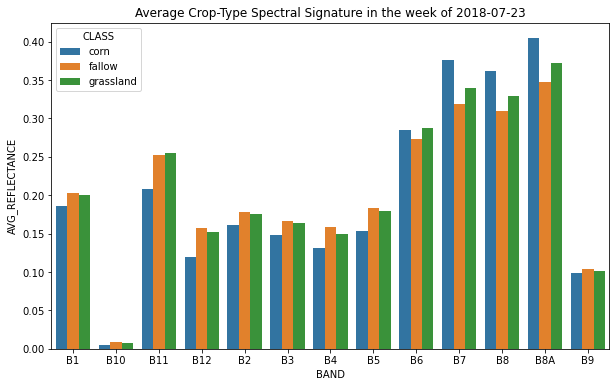

In [31]:
BANDS = ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', VISIBLE_RED_BAND, 'B5', 'B6', 'B7', NEAR_INFRARED_BAND,
       'B8A', 'B9']
average_crop_type_signature = average_crop_type_signature.loc[average_crop_type_signature['WEEK'] == "2018-07-23"]
average_crop_type_signature = average_crop_type_signature[average_crop_type_signature["CLASS"].isin(["corn", "fallow", "grassland"])]
spectral_signature_in_a_week_long = average_crop_type_signature.melt(id_vars="CLASS", value_vars=BANDS, var_name="BAND", value_name = "AVG_REFLECTANCE")
print(spectral_signature_in_a_week_long)
spectral_signature_in_a_week_long.rename(columns={"B10": 'Blue', "B11": "Green", "B12": "Red"}, inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1 = sns.barplot(x="BAND", y="AVG_REFLECTANCE", hue="CLASS", data=spectral_signature_in_a_week_long)
ax1.set_title("Average Crop-Type Spectral Signature in the week of 2018-07-23")